<a href="https://colab.research.google.com/github/harnalashok/deeplearning/blob/main/Transfer_learning_with_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 14th Jan, 2023
# Train an Image Classifier with fastai and Transfer Learning
# Ref:
#      https://www.analyticsvidhya.com/blog/2021/05/training-state-of-the-art-deep-learning-models-with-fast-ai/
# Use GPU to accelerate training (Edit->Notebook settings)    

In [ ]:
# Not required as fastai upgrade
#  is generally already installed
!pip install fastai --upgrade

In [2]:
 # To see prettier 'help' using doc()
 !pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.9 MB/s eta 0:00:00


In [3]:
# Display multiple outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
# Call libraries:
from fastai.vision.all import *

In [5]:
# Download MNIST data
path = untar_data(URLs.MNIST)

In [6]:
# list directory contents 
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [7]:
# Load images from directories
dls = ImageDataLoaders.from_folder(path=path, 
                                   train='training', 
                                   valid='testing', 
                                   shuffle=True)

In [8]:
# It is an object of DataLoaders class
type(dls)

fastai.data.core.DataLoaders

In [ ]:
# Get help on ImageDataLoaders
#  And read more about it
doc(ImageDataLoaders.from_folder)

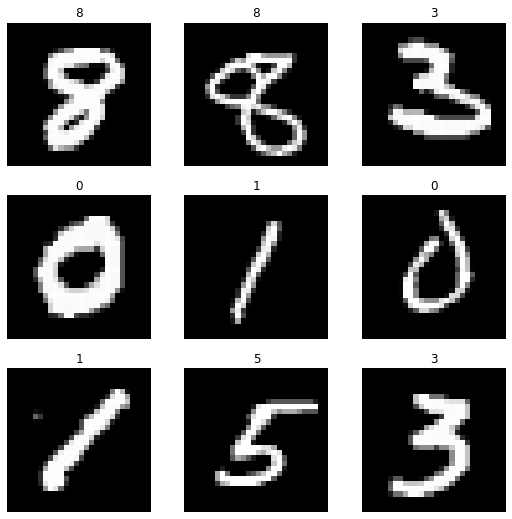

In [9]:
# Look at a batch of images
dls.train.show_batch()


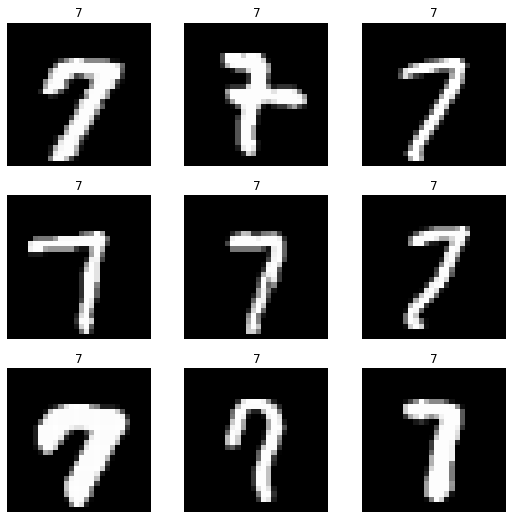

In [10]:
dls.valid.show_batch()

In [11]:
learn = cnn_learner(dls, 
                    resnet18, 
                    metrics=[accuracy, error_rate])

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [13]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# Train for 4-epochs
# Use GPU for faster training (Edit->Notebook settings)
# CPU consumes around 8 minutes per epoch
# GPU takes 1.30 minutes per epoch
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.697555,0.441798,0.858500,0.141500,01:17


epoch,train_loss,valid_loss,accuracy,error_rate,time


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.131508,0.064983,0.979600,0.020400,01:12
1,0.076328,0.047094,0.985700,0.014300,01:11
2,0.031929,0.032133,0.991000,0.009000,01:11
3,0.015049,0.029735,0.991100,0.008900,01:12


In [ ]:
# get all the image paths from testing folder
images = get_image_files(path / 'testing')

In [ ]:
# select an image and display
img = PILImage.create(images[4432])
img

In [ ]:
# predict the image class
lbl, _ , _ = learn.predict(img)
lbl

'6'

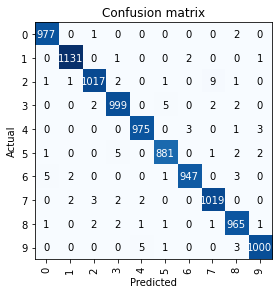

In [ ]:
# We can also generate classification report from the model for inference
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()

In [ ]:
################# Done ######################33